# Classification on Iris Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = sns.load_dataset('iris')

In [3]:
y = X.species
X = X.drop('species',axis=1)

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

X is now the matrix with the feature values

y is a series with the target value for each set of features

Let's use y as the target values

Target could be:
* discrete values
  * number (integers)
  * boolean
  * strings
* continous
  * floating point number
    * e.g. error (with threshold == binary)
    * e.g. wear of the device (with treshold == binary / typically good / medium / bad or with prediction when threshold will be exceeded == remaining useful life (RUL))
 
Here we have a discrete target.

The ML - Task can be 
* Classification (discrete targets)
* Regression (continous targets)

So we will do a classification.

In [8]:
from sklearn import svm

clf = svm.SVC(random_state=42)

clf.fit(X,y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
y_pred = pd.Series(clf.predict(X)) # strictly speaking this is stupid! We should use unseen data!

Now we have a prediction. We can and should compare it to our target values (ground truth).

In [13]:
cor = (y == y_pred).sum()
ncor = (y != y_pred).sum()
acc = cor / (cor + ncor)
print(f"Correct: {cor}")
print(f"Not cor: {ncor}")

print(f"Accuracy = {acc}")

Correct: 146
Not cor: 4
Accuracy = 0.9733333333333334


In [15]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.9733333333333334


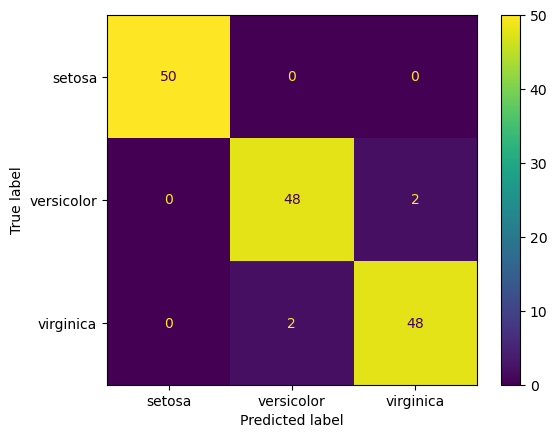

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay.from_estimator(clf,X,y)

plt.show()